In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sns.set(style="whitegrid")

In [5]:
import pandas as pd

df = pd.read_json("C:/Users/hp5cd/Downloads/nyt2.json", lines=True)
df.head()


,_id,bestsellers_date,published_date,amazon_product_url,author,description,price,publisher,title,rank,rank_last_week,weeks_on_list
0,{'$oid': '5b4aa4ead3089013507db18b'},{'$date': {'$numberLong': '1211587200000'}},{'$date': {'$numberLong': '1212883200000'}},http://www.amazon.com/Odd-Hours-Dean-Koontz/dp...,Dean R Koontz,"Odd Thomas, who can communicate with the dead,...",{'$numberInt': '27'},Bantam,ODD HOURS,{'$numberInt': '1'},{'$numberInt': '0'},{'$numberInt': '1'}
1,{'$oid': '5b4aa4ead3089013507db18c'},{'$date': {'$numberLong': '1211587200000'}},{'$date': {'$numberLong': '1212883200000'}},http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,{'$numberDouble': '25.99'},"Little, Brown",THE HOST,{'$numberInt': '2'},{'$numberInt': '1'},{'$numberInt': '3'}
2,{'$oid': '5b4aa4ead3089013507db18d'},{'$date': {'$numberLong': '1211587200000'}},{'$date': {'$numberLong': '1212883200000'}},http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,{'$numberDouble': '24.95'},St. Martin's,LOVE THE ONE YOU'RE WITH,{'$numberInt': '3'},{'$numberInt': '2'},{'$numberInt': '2'}
3,{'$oid': '5b4aa4ead3089013507db18e'},{'$date': {'$numberLong': '1211587200000'}},{'$date': {'$numberLong': '1212883200000'}},http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,{'$numberDouble': '22.95'},Putnam,THE FRONT,{'$numberInt': '4'},{'$numberInt': '0'},{'$numberInt': '1'}
4,{'$oid': '5b4aa4ead3089013507db18f'},{'$date': {'$numberLong': '1211587200000'}},{'$date': {'$numberLong': '1212883200000'}},http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,{'$numberDouble': '24.95'},Doubleday,SNUFF,{'$numberInt': '5'},{'$numberInt': '0'},{'$numberInt': '1'}


In [6]:
print("Shape:", df.shape)
print("\nInfo:")
df.info()

Shape: (10195, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10195 entries, 0 to 10194
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 10195 non-null  object
 1   bestsellers_date    10195 non-null  object
 2   published_date      10195 non-null  object
 3   amazon_product_url  10195 non-null  object
 4   author              10195 non-null  object
 5   description         10195 non-null  object
 6   price               10195 non-null  object
 7   publisher           10195 non-null  object
 8   title               10195 non-null  object
 9   rank                10195 non-null  object
 10  rank_last_week      10195 non-null  object
 11  weeks_on_list       10195 non-null  object
dtypes: object(12)
memory usage: 955.9+ KB


In [7]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 _id                   0
bestsellers_date      0
published_date        0
amazon_product_url    0
author                0
description           0
price                 0
publisher             0
title                 0
rank                  0
rank_last_week        0
weeks_on_list         0
dtype: int64


In [10]:
df.describe(include='all')


,_id,bestsellers_date,published_date,amazon_product_url,author,description,price,publisher,title,rank,rank_last_week,weeks_on_list
count,10195,10195,10195,10195,10195,10195,10195,10195,10195,10195,10195,10195
unique,10195,529,529,2329,738,2972,38,176,2300,20,17,135
top,{'$oid': '5b4aa4ead3089013507dd95d'},{'$date': {'$numberLong': '1484352000000'}},{'$date': {'$numberLong': '1485648000000'}},http://www.amazon.com/All-Light-We-Cannot-See/...,John Grisham,,{'$numberInt': '0'},Putnam,ALL THE LIGHT WE CANNOT SEE,{'$numberInt': '1'},{'$numberInt': '0'},{'$numberInt': '1'}
freq,1,20,20,141,226,246,6184,1061,141,529,4174,2032


In [14]:
def extract_date(val):
    if isinstance(val, dict) and '$date' in val:
        date_val = val['$date']
        
        if isinstance(date_val, (int, float)):
            return pd.to_datetime(date_val, unit='ms')
        elif isinstance(date_val, str):
    
            if date_val.isdigit():
               
                return pd.to_datetime(int(date_val), unit='ms')
            else:
              
                return pd.to_datetime(date_val)
        else:
        
            return pd.to_datetime(date_val)
    else:
    
        return pd.to_datetime(val)


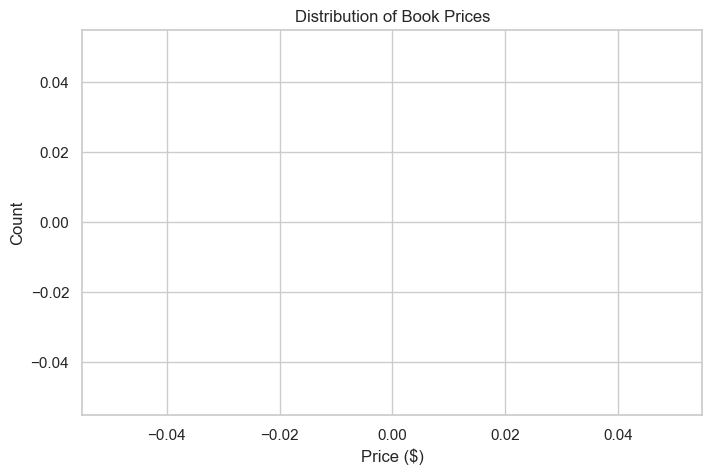

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


prices = pd.to_numeric(df['price'], errors='coerce').dropna()

plt.figure(figsize=(8,5))
sns.histplot(prices, kde=True, bins=20)
plt.title('Distribution of Book Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()


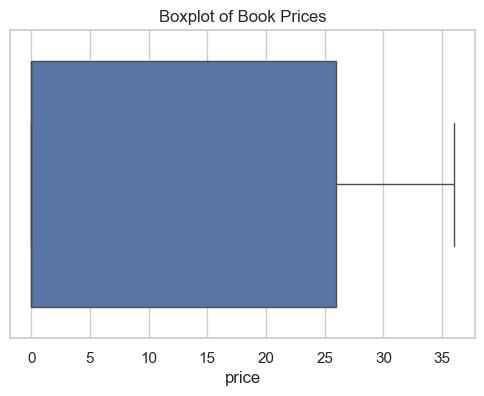

In [24]:
def extract_price(val):
    if isinstance(val, dict):
        try:
            return float(list(val.values())[0])
        except:
            return None
    try:
        return float(val)
    except:
        return None

df['price'] = df['price'].apply(extract_price)
df = df[df['price'].notnull()]  # drop rows with NaN price

plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Book Prices')
plt.show()

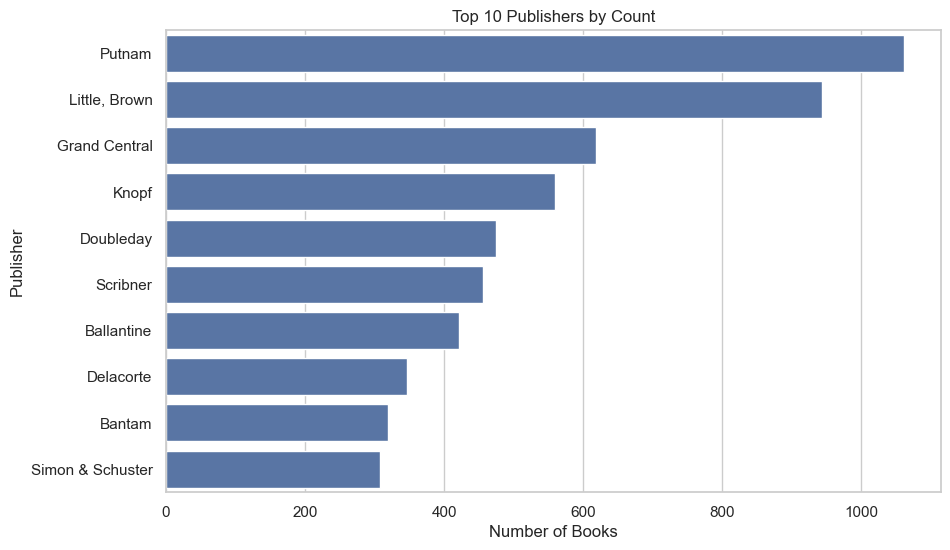

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['publisher'], order=df['publisher'].value_counts().index[:10])
plt.title('Top 10 Publishers by Count')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.show()

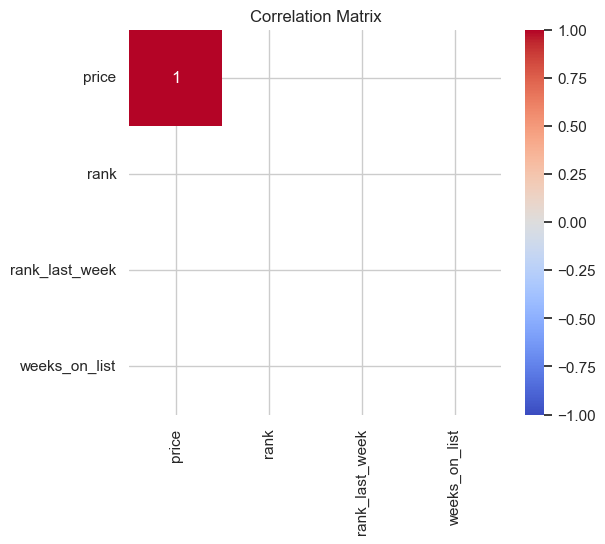

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['price', 'rank', 'rank_last_week', 'weeks_on_list']
existing_cols = [col for col in cols if col in df.columns]
df[existing_cols] = df[existing_cols].apply(pd.to_numeric, errors='coerce')
df_clean = df.dropna(subset=existing_cols, how='all')
corr = df_clean[existing_cols].corr()
if not corr.isnull().all().all():
    plt.figure(figsize=(6, 5))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("Correlation matrix could not be computed — all values are NaN.")


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
cols = ['price', 'rank', 'rank_last_week', 'weeks_on_list']
existing_cols = [col for col in cols if col in df.columns]
df_clean = df[existing_cols].apply(pd.to_numeric, errors='coerce')
df_clean = df_clean.dropna(how='all')
df_clean = df_clean.dropna()
if not df_clean.empty:
    sns.pairplot(df_clean)
    plt.suptitle("Pairplot of Numerical Features", y=1.02)
    plt.show()
else:
    print("Data is empty after cleaning. Pairplot cannot be generated.")


Data is empty after cleaning. Pairplot cannot be generated.


In [28]:

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['weeks_on_list'] = pd.to_numeric(df['weeks_on_list'], errors='coerce')

df = df.dropna(subset=['price', 'weeks_on_list'])

print("👉 Most expensive book:")
most_expensive = df[df['price'] == df['price'].max()][['title', 'author', 'price']]
print(most_expensive.to_string(index=False))

print("\n👉 Books on list for more than 5 weeks:")
long_listed = df[df['weeks_on_list'] > 5][['title', 'weeks_on_list']]
print(long_listed.to_string(index=False))


👉 Most expensive book:
Empty DataFrame
Columns: [title, author, price]
Index: []

👉 Books on list for more than 5 weeks:
Empty DataFrame
Columns: [title, weeks_on_list]
Index: []
